In [1]:
## Figure 9 - Comparison of different unwrapping error correction methods
%matplotlib inline
import os
from matplotlib import pyplot as plt, ticker
from pysar.objects import sensor
from pysar.utils import readfile, plot as pp
from pysar.simulation.plot import *

work_dir = os.path.expanduser('~/insarlab/Galapagos/GalapagosSenDT128/PYSAR/UNW_COR')
os.chdir(work_dir)
print('Go to directory: '+work_dir)
proj_name = sensor.project_name2sensor_name(work_dir)[1]

ifgram_file = '../INPUTS/ifgramStack.h5'
water_mask_file = '../waterMask.h5'
coh_mask_file = '../maskSpatialCoh.h5'
mask_cc_file = '../maskConnComp.h5'
atr = readfile.read_attribute(ifgram_file)
ref_y, ref_x = int(atr['REF_Y']), int(atr['REF_X'])

tcoh_files= ['tempCoh_unwrapPhase.h5',
             'tempCoh_unwrapPhase_bridge.h5',
             'tempCoh_unwrapPhase_bridge_closure.h5']
## Points of Interest
pts_yx = []
pts_yx.append([930, 1250])
pts_yx.append([620, 140])

Go to directory: /Users/yunjunz/insarlab/Galapagos/GalapagosSenDT128/PYSAR/UNW_COR


In [2]:
## run unwrap_error_*.py
cmd  = 'unwrap_error_bridging.py {} --water-mask {} '.format(ifgram_file, water_mask_file)
cmd += ' --update -i unwrapPhase -o unwrapPhase_bridge\n'
cmd += 'unwrap_error_phase_closure.py {} --update --fast '.format(ifgram_file)
cmd += ' -i unwrapPhase_bridge -o unwrapPhase_bridge_closure'
print(cmd)
#os.system(cmd)

unwrap_error_bridging.py ../INPUTS/ifgramStack.h5 --water-mask ../waterMask.h5  --update -i unwrapPhase -o unwrapPhase_bridge
unwrap_error_phase_closure.py ../INPUTS/ifgramStack.h5 --update --fast  -i unwrapPhase_bridge -o unwrapPhase_bridge_closure


In [3]:
## Generate different temporal coherence
for dsName in ['unwrapPhase', 'unwrapPhase_bridge', 'unwrapPhase_bridge_closure']:
    cmd  = 'ifgram_inversion.py {} -w var --water-mask {} '.format(ifgram_file, water_mask_file)
    cmd += '-i {d} -o timeseries.h5 tempCoh_{d}.h5'.format(d=dsName)
    print(cmd)
    #os.system(cmd)

ifgram_inversion.py ../INPUTS/ifgramStack.h5 -w var --water-mask ../waterMask.h5 -i unwrapPhase -o timeseries.h5 tempCoh_unwrapPhase.h5
ifgram_inversion.py ../INPUTS/ifgramStack.h5 -w var --water-mask ../waterMask.h5 -i unwrapPhase_bridge -o timeseries.h5 tempCoh_unwrapPhase_bridge.h5
ifgram_inversion.py ../INPUTS/ifgramStack.h5 -w var --water-mask ../waterMask.h5 -i unwrapPhase_bridge_closure -o timeseries.h5 tempCoh_unwrapPhase_bridge_closure.h5


save figure to file: /Users/yunjunz/insarlab/Galapagos/GalapagosSenDT128/PYSAR/UNW_COR/GalapagosSenDT128_unw_err.png


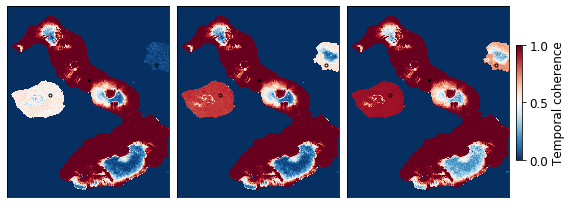

In [18]:
## Figure 2 - Plot mask and temporal coherence
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=[9, 4], sharex=True, sharey=True)
cmap = pp.ColormapExt('RdBu_r').get_colormap()    #RdBu_r, gray, viridis
for i in range(len(tcoh_files)):
    ax = axs[i]
    data = readfile.read(tcoh_files[i])[0]
    im1 = ax.imshow(data, vmin=0, vmax=1, cmap=cmap)
    ax = pp.auto_flip_direction(atr, ax=ax, print_msg=False)
for ax in axs:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.tick_params(which='both', direction='in', top=True, bottom=True, left=True, right=True, labelsize=font_size)
fig.subplots_adjust(wspace=0.05)

# reference pixel and pixel of interest
for ax in axs:
    ax.plot(ref_x, ref_y, 'ks', ms='2')
    for yx in pts_yx:
        ax.plot(yx[1], yx[0], 'o', ms='3', mfc='none', mec='k')

## colorbar
cax = fig.add_axes([0.91, 0.3, 0.01, 0.4])
#cax = fig.add_axes([0.37, 0.09, 0.3, 0.03])
cbar = plt.colorbar(im1, cax=cax)
cbar.ax.tick_params(labelsize=font_size)
cbar.locator = ticker.MaxNLocator(nbins=2)
cbar.update_ticks()
cbar.set_label('Temporal coherence', fontsize=font_size)
cbar.ax.xaxis.set_label_position('top')

out_file = os.path.join(os.getcwd(), '{}_unw_err.png'.format(proj_name))
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to file:',out_file)
plt.show()

In [7]:
## Detailed Value of Temporal Coherence value on POIs
tcoh_list = []
for fname in tcoh_files:
    tcoh = readfile.read(fname)[0]
    tcoh_list.append(tcoh)

for yx in pts_yx:
    print('Point Y/X: {}'.format(yx))
    for tcoh in tcoh_list:
        print(tcoh[yx[0], yx[1]])

Point Y/X: [930, 1250]
0.4925048
0.85846174
0.9331423
Point Y/X: [620, 140]
0.06883445
0.56652766
0.71353865
